WEEKLY DATA ANALYSIS CHALLANGE #19

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
cst = pd.read_csv('coastal_db.csv')
cst.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,50.00,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1,NaN


Number of rows and columns

In [3]:
num_rows, num_columns = cst.shape
print(f'This dataset has {num_rows} rows and {num_columns} columns')

This dataset has 1087 rows and 56 columns


Is there any missing data?

In [4]:
cst.isnull().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [5]:
remove = ['Length',
          'Speed',
          'Status',
          'Opening date',
          'Type', 
          'Height restriction', 
          'Model',
          'Height', 
          'Inversions', 
          'Lift/launch system',
          'Cost', 
          'Trains', 
          'Park section',
          'Duration',
          'Capacity', 
          'G-force',
          'Designer',
          'Max vertical angle',
          'Drop',
          'Soft opening date',
          'Fast Lane available',
          'Replaced',
          'Track layout',
          'Fastrack available',
          'Soft opening date.1',
          'Closing date',
          'Opened',
          'Replaced by',
          'Website',
          'Flash Pass Available',
          'Must transfer from wheelchair',
          'Theme',
          'Single rider line available',
          'Restraint Style',
          'Flash Pass available2',
          'Acceleration',
          'Restraints',
          'Name',
          'latitude',
          'longitude',
          'speed1',
          'speed2',
          'speed1_value',
          'speed1_unit',
          'height_value',
          'height_unit']

cst_2 = cst.drop(remove, axis=1)
cst_2.isnull().sum()

coaster_name            0
Location                0
Manufacturer           59
year_introduced         0
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft               0
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [6]:
cst_2 = cst_2.dropna()
cst_2.isnull().sum()

coaster_name          0
Location              0
Manufacturer          0
year_introduced       0
Type_Main             0
opening_date_clean    0
speed_mph             0
height_ft             0
Inversions_clean      0
Gforce_clean          0
dtype: int64

In [7]:
num_row, num_column = cst_2.shape
print(f'This dataset has {num_row} rows and {num_column} columns')

This dataset has 282 rows and 10 columns


Display the summary statistics of the numeric columns using the describe method.

In [8]:
cst_2.describe()

,year_introduced,speed_mph,Inversions_clean,Gforce_clean
count,282.000000,282.000000,282.000000,282.000000
mean,2000.109929,54.313121,1.758865,3.749433
std,15.370813,17.295847,2.342249,0.894507
min,1884.000000,6.000000,0.000000,0.800000
25%,1995.000000,45.000000,0.000000,3.400000
50%,2001.000000,54.050000,0.000000,3.950000
75%,2009.000000,65.000000,3.000000,4.300000
max,2022.000000,149.100000,14.000000,6.500000


Rename the following columns:
        {
            'coaster_name' : 'Coaster_Name',
            'year_introduce' : 'Year_Introduced',
            'opening_date_clean' : 'Opening_Date',
            'speed_mph' : 'Speed_mph',
            'height_ft' : 'Height_ft',
            'Inversions_clean' : 'Inversions',
            'Geforce_celan' : 'Geforce'
        }


In [9]:
replace = {
    'coaster_name' : 'Coaster_Name',
    'year_introduced' : 'Year_Introduced',
    'opening_date_clean' : 'Opening_Date',
    'speed_mph' : 'Speed_mph',
    'height_ft' : 'Height_ft',
    'Inversions_clean' : 'Inversions',
    'Gforce_clean' : 'Geforce'
}

cst_2 = cst_2.rename(columns=replace)
cst_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 1084
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Coaster_Name     282 non-null    object 
 1   Location         282 non-null    object 
 2   Manufacturer     282 non-null    object 
 3   Year_Introduced  282 non-null    int64  
 4   Type_Main        282 non-null    object 
 5   Opening_Date     282 non-null    object 
 6   Speed_mph        282 non-null    float64
 7   Height_ft        282 non-null    object 
 8   Inversions       282 non-null    int64  
 9   Geforce          282 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 24.2+ KB


Are there any duplicate rows?

In [10]:
duplicate = cst_2.duplicated().sum()
print(f'Total number of duplicate rows is {duplicate}')

Total number of duplicate rows is 0


What are the top 3 years with the most roller coaster

In [11]:
year_pivot = cst_2.pivot_table(index='Year_Introduced', values='Coaster_Name', aggfunc='count')
n = 3
top3_years = year_pivot.nlargest(n, 'Coaster_Name')
top3_years

,Coaster_Name
Year_Introduced,
2000,14
2001,13
1999,12


What are the top 5 Locations with the most number of coasters

In [12]:
location = cst_2.pivot_table(index='Location', values='Coaster_Name', aggfunc='count')
n = 5
top10_location = location.nlargest(n, 'Coaster_Name')

top10_location

,Coaster_Name
Location,
Other,12
Kings Island,10
Six Flags Magic Mountain,10
Alton Towers,9
Warner Bros. Movie World,6


What are the top 10 Manufacturers with the most number of coaster built

In [13]:
manufacturer = cst_2.pivot_table(index='Manufacturer', values='Coaster_Name', aggfunc='count')
n = 10
top10_manufacturer = manufacturer.nlargest(n, 'Coaster_Name')

top10_manufacturer

,Coaster_Name
Manufacturer,
Bolliger & Mabillard,49
Vekoma,39
Intamin,28
Arrow Dynamics,23
Mack Rides,19
Gerstlauer,17
Rocky Mountain Construction,10
Anton Schwarzkopf,8
Custom Coasters International,8


What is the average speed? Also display a plot to show it's distribution.

In [14]:
avg_speed = cst_2['Speed_mph'].mean().round(2)
print(f'The average speed of roller coasters is {avg_speed} mph')

The average speed of roller coasters is 54.31 mph


Text(0.5, 1.0, 'Distribution of Speed')

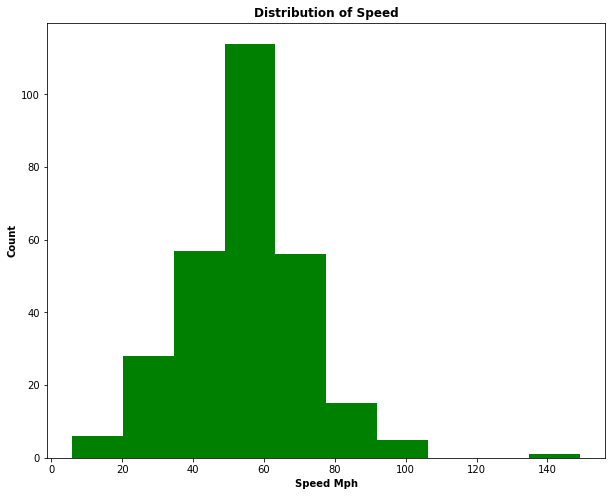

In [15]:
fig = plt.figure(figsize=(10,8))
plt.hist(data=cst_2, x='Speed_mph', color='green')
plt.xlabel('Speed Mph', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Distribution of Speed', weight='bold')

Explore the feature relationships. Are there any positively or negatively correlated relationships

Text(0.5, 1.1, 'Correlation coefficient = 0.55')

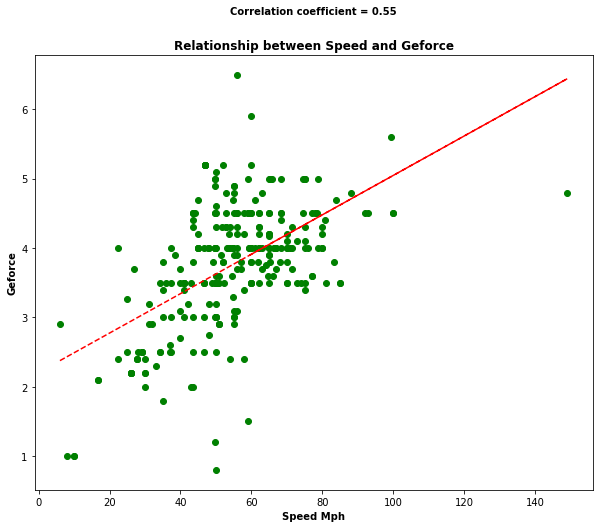

In [16]:
x = cst_2['Speed_mph']
y = cst_2['Geforce']

fig = plt.figure(figsize=(10,8))
plt.scatter(x, y, color='green')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--')
corr_coef = np.corrcoef(x, y)[1, 0]

plt.xlabel('Speed Mph', weight='bold')
plt.ylabel('Geforce', weight='bold')
plt.title('Relationship between Speed and Geforce', weight='bold')
plt.text(0.5, 1.1, f"Correlation coefficient = {corr_coef:.2f}", ha='center', va='center', weight='bold', transform=plt.gca().transAxes)

c:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.1, 'Correlation coefficient = 0.37')

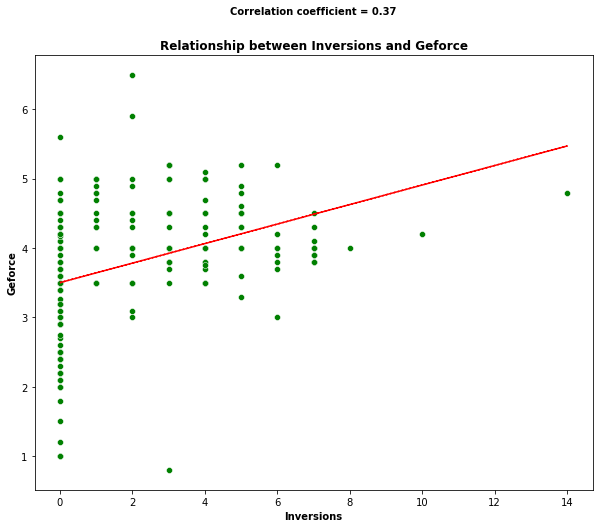

In [17]:
x = cst_2['Inversions']
y = cst_2['Geforce']

fig = plt.figure(figsize=(10,8))
sns.scatterplot(x, y, color='green')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--')
corr_coef = np.corrcoef(x, y)[1, 0]

plt.xlabel('Inversions', weight='bold')
plt.ylabel('Geforce', weight='bold')
plt.title('Relationship between Inversions and Geforce', weight='bold')
plt.text(0.5, 1.1, f"Correlation coefficient = {corr_coef:.2f}", ha='center', va='center', weight='bold', transform=plt.gca().transAxes)

In [18]:
try:
    cst_2['Height_ft'] = cst_2['Height_ft'].astype('float64')
except:
    cst_2['Height_ft'] = pd.to_numeric(cst_2['Height_ft'], errors='coerce')

cst_2['Height_ft'].info()

<class 'pandas.core.series.Series'>
Int64Index: 282 entries, 0 to 1084
Series name: Height_ft
Non-Null Count  Dtype  
--------------  -----  
207 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


c:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship between Speed, Height and Geforce')

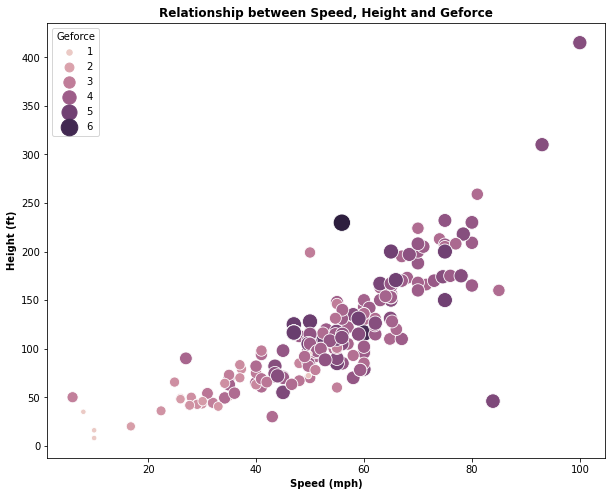

In [19]:
x = cst_2['Speed_mph']
y = cst_2['Height_ft']
z = cst_2['Geforce']

fig = plt.figure(figsize=(10,8))
sns.scatterplot(x, y, z, size=z, sizes=(20, 300))

plt.xlabel('Speed (mph)', weight='bold')
plt.ylabel('Height (ft)', weight='bold')
plt.title('Relationship between Speed, Height and Geforce', weight='bold')